## Importies

In [1]:
from os import path

from matplotlib import pyplot as plt
import seaborn as sns
from operator import attrgetter

import networkx as nx

In [2]:
from ga4stpg.graph.reader import read_problem

In [3]:
instance_filename = "steinb5.txt"

stpg = read_problem('..', '..', "ppgi-stpg-gpx", "datasets", "ORLibrary", instance_filename)

In [4]:
terminals = set(stpg.terminals)

print(len(terminals))

terminals

13


{3, 5, 7, 13, 15, 16, 20, 23, 24, 31, 35, 37, 39}

In [5]:
attributes = ['name', 'nro_nodes', 'nro_edges', 'nro_terminals']

mx = len(attributes[-1])

print("STPG properties")
for attr in attributes:
    print(attr.rjust(mx),': ', attrgetter(attr)(stpg))

STPG properties
         name :  B5
    nro_nodes :  50
    nro_edges :  100
nro_terminals :  13


In [6]:
from ga4stpg.util import STEIN_B
from ga4stpg.graph import ReaderORLibrary

from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedRandomWalk, GenerateBasedPrimRST
from ga4stpg.tree.pxcrossover import PXTree

In [7]:
def to_networkx_graph(mygraph):
    
    nxgraph = nx.Graph()
    
    edges = [e for e in mygraph.gen_undirect_edges()]
    
    nxgraph.add_edges_from(edges)
    
    return nxgraph

In [8]:
generator = GenerateBasedPrimRST(stpg)
evaluator = EvaluateTreeGraph(stpg)
crossover = PXTree(stpg)

In [35]:
aa = generator()
bb = generator()

In [36]:
child = crossover(aa, bb)
rchild = crossover(bb, aa)

In [37]:
child.edges == rchild.edges

True

In [38]:
evaluator(child)

(213, 1)

In [39]:
evaluator(rchild)

(213, 1)

In [40]:
aa = to_networkx_graph(aa)
bb = to_networkx_graph(bb)

child = to_networkx_graph(child)

In [41]:
g_union = nx.compose(aa, bb)

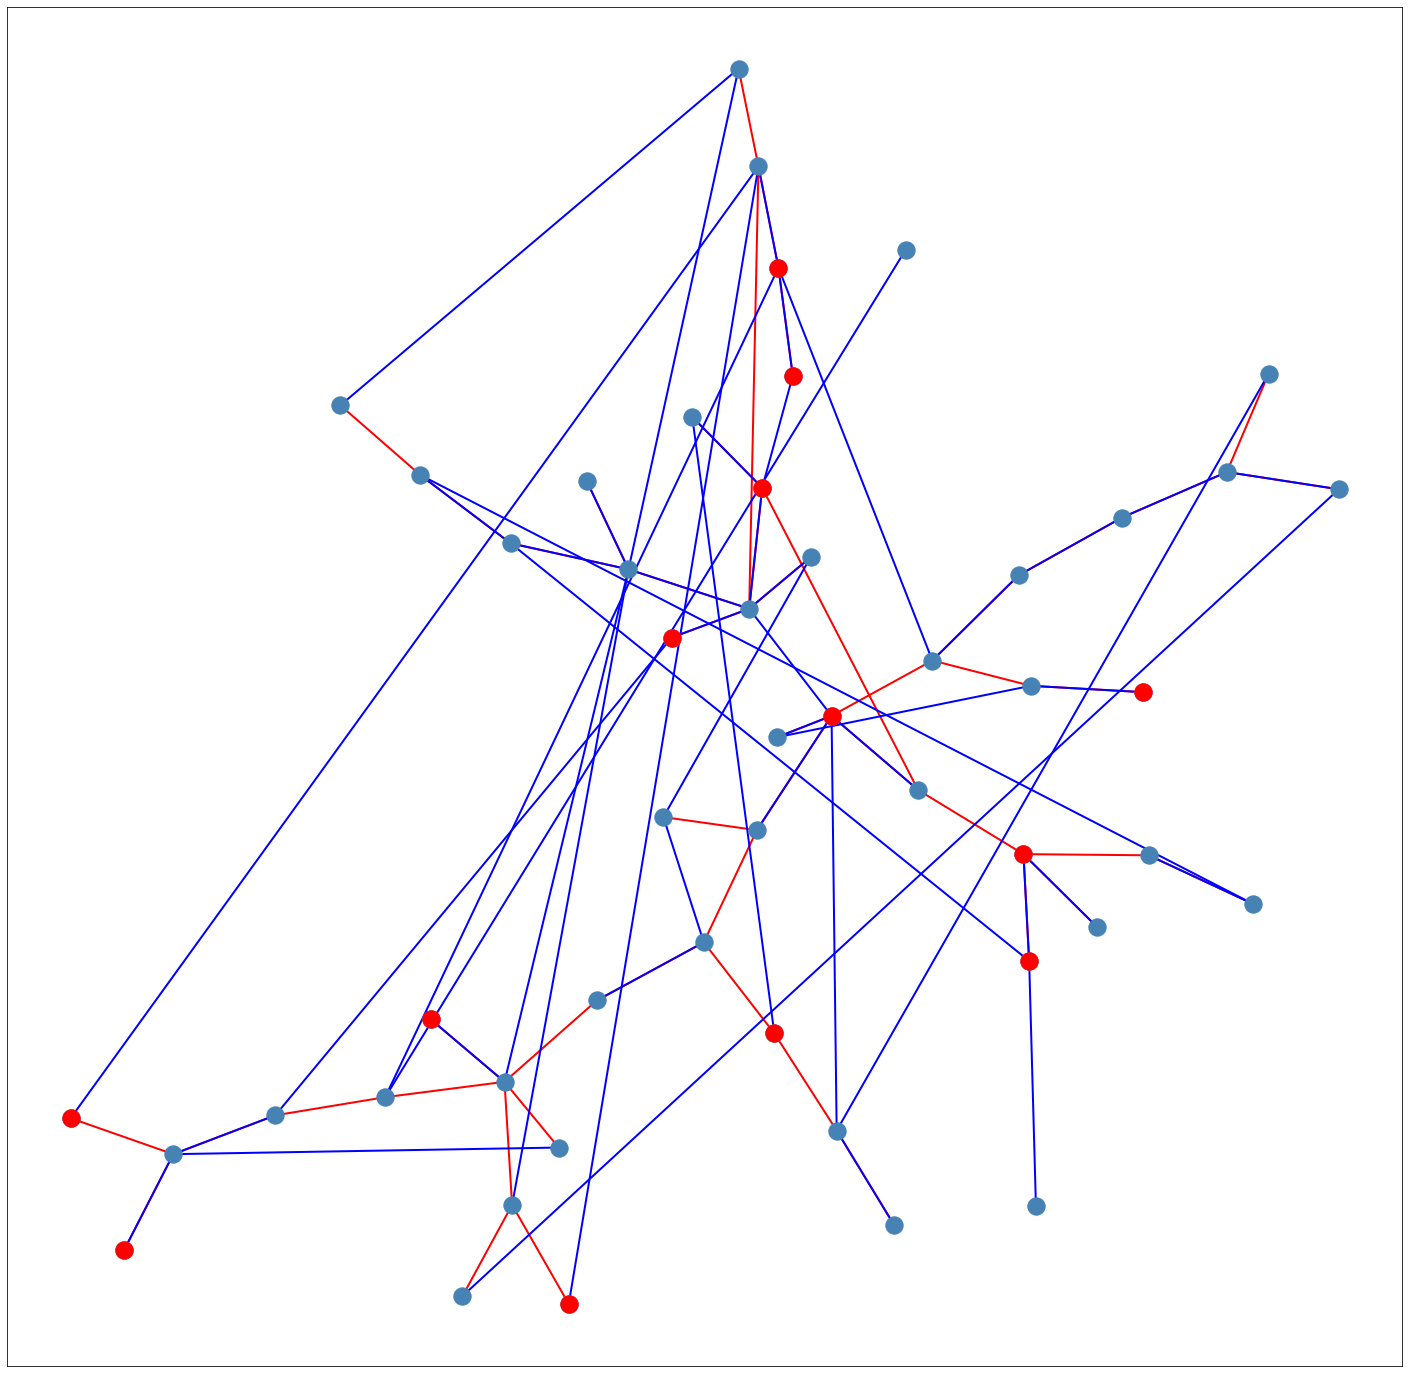

In [55]:
common_edges = aa.edges & bb.edges
disjoint_edges = aa.edges ^ bb.edges

plt.figure(figsize=(25, 25))

positions = dict() # nx.kamada_kawai_layout(g_union)
pos_aa    = nx.kamada_kawai_layout(aa)
pos_bb    = nx.kamada_kawai_layout(bb)
pos_child = nx.kamada_kawai_layout(child)

positions.update(pos_aa)
positions.update(pos_bb)
positions.update(pos_child)


# nx.draw_networkx(g_union, pos=positions)

# nx.draw_networkx_edges(g_union, positions, edgelist=disjoint_edges, edge_color='black', width=2.0, style='--')
nx.draw_networkx_edges(aa, positions, edgelist=aa.edges, edge_color='red', width=2.0, style='-')
nx.draw_networkx_edges(bb, positions, edgelist=bb.edges, edge_color='blue', width=2.0, style='-')

# nx.draw_networkx_edges(g_union, positions, edgelist=common_edges, edge_color='black', width=3.0)
# nx.draw_networkx_edges(child, positions, edgelist=child.edges, edge_color='orange', width=3.0, style='--')

# nodes
nx.draw_networkx_nodes(g_union, positions, nodelist=g_union.nodes, node_color='steelblue')
# nx.draw_networkx_nodes(aa, positions, nodelist=aa.nodes, node_color='steelblue')
nx.draw_networkx_nodes(aa, positions, nodelist=terminals, node_color='red')


In [43]:
help(nx.disjoint_union)

Help on function disjoint_union in module networkx.algorithms.operators.binary:

disjoint_union(G, H)
    Return the disjoint union of graphs G and H.
    
    This algorithm forces distinct integer node labels.
    
    Parameters
    ----------
    G,H : graph
       A NetworkX graph
    
    Returns
    -------
    U : A union graph with the same type as G.
    
    Notes
    -----
    A new graph is created, of the same class as G.  It is recommended
    that G and H be either both directed or both undirected.
    
    The nodes of G are relabeled 0 to len(G)-1, and the nodes of H are
    relabeled len(G) to len(G)+len(H)-1.
    
    Graph, edge, and node attributes are propagated from G and H
    to the union graph.  If a graph attribute is present in both
    G and H the value from H is used.



In [15]:
help(nx.union)

Help on function union in module networkx.algorithms.operators.binary:

union(G, H, rename=(None, None), name=None)
    Return the union of graphs G and H.
    
    Graphs G and H must be disjoint, otherwise an exception is raised.
    
    Parameters
    ----------
    G,H : graph
       A NetworkX graph
    
    rename : bool , default=(None, None)
       Node names of G and H can be changed by specifying the tuple
       rename=('G-','H-') (for example).  Node "u" in G is then renamed
       "G-u" and "v" in H is renamed "H-v".
    
    name : string
       Specify the name for the union graph
    
    Returns
    -------
    U : A union graph with the same type as G.
    
    Notes
    -----
    To force a disjoint union with node relabeling, use
    disjoint_union(G,H) or convert_node_labels_to integers().
    
    Graph, edge, and node attributes are propagated from G and H
    to the union graph.  If a graph attribute is present in both
    G and H the value from H is used.
    

In [16]:
help(nx.compose)

Help on function compose in module networkx.algorithms.operators.binary:

compose(G, H)
    Returns a new graph of G composed with H.
    
    Composition is the simple union of the node sets and edge sets.
    The node sets of G and H do not need to be disjoint.
    
    Parameters
    ----------
    G, H : graph
       A NetworkX graph
    
    Returns
    -------
    C: A new graph  with the same type as G
    
    Notes
    -----
    It is recommended that G and H be either both directed or both undirected.
    Attributes from H take precedent over attributes from G.
    
    For MultiGraphs, the edges are identified by incident nodes AND edge-key.
    This can cause surprises (i.e., edge `(1, 2)` may or may not be the same
    in two graphs) if you use MultiGraph without keeping track of edge keys.

